In [1]:
import pandas as pd
import numpy as np

Na skupu bank.csv izvršiti sledece promene:

In [2]:
#Učitati skup 24-bank.csv
data = pd.read_csv('datasets/24-bank.csv')

In [3]:
# Ispisati prvih 5 instanci
data.head()

,STAROST,POSAO,BRACNO_STANJE,OBRAZOVANJE,SREDNJE_GOD_STANJE_EUR,STAMBENI_KREDIT,LICNI_KREDIT,KONTAKT,DUZINA_RAZGOVORA_SEC,BROJ_RAZGOVORA,OROCENA_STEDNJA
0,30,nezaposlen,u_braku,osnevne,1787,ne,ne,mobilni,79,1,ne
1,33,usluge,u_braku,srednje,4789,da,da,mobilni,220,1,ne
2,35,rukovodstvo,samac,visoko,1350,da,ne,mobilni,185,1,ne
3,30,rukovodstvo,u_braku,visoko,1476,da,da,nepoznato,199,4,ne
4,59,manuelni_poslovi,u_braku,srednje,0,da,ne,nepoznato,226,1,ne


In [4]:
data.describe()

,STAROST,SREDNJE_GOD_STANJE_EUR,DUZINA_RAZGOVORA_SEC,BROJ_RAZGOVORA
count,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,2.793630
std,10.576211,3009.638142,259.856633,3.109807
min,19.000000,-3313.000000,4.000000,1.000000
25%,33.000000,69.000000,104.000000,1.000000
50%,39.000000,444.000000,185.000000,2.000000
75%,49.000000,1480.000000,329.000000,3.000000
max,87.000000,71188.000000,3025.000000,50.000000


In [5]:
# Eliminisati instance koje imaju negativnu vrednost u atributu srednje_god_stanje_eur.

In [6]:
data.replace(data['SREDNJE_GOD_STANJE_EUR'] < 0, np.nan, inplace=True)
data.dropna(inplace=True)

In [7]:
data.describe()

,STAROST,SREDNJE_GOD_STANJE_EUR,DUZINA_RAZGOVORA_SEC,BROJ_RAZGOVORA
count,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,2.793630
std,10.576211,3009.638142,259.856633,3.109807
min,19.000000,-3313.000000,4.000000,1.000000
25%,33.000000,69.000000,104.000000,1.000000
50%,39.000000,444.000000,185.000000,2.000000
75%,49.000000,1480.000000,329.000000,3.000000
max,87.000000,71188.000000,3025.000000,50.000000


In [8]:
# Vrednosti atributa starost podeliti u 5 kategorija jednake širine. HINT: Koristiti pd.cut(....)

[1055. 2104. 1188.  136.   38.] [19.  32.6 46.2 59.8 73.4 87. ] <BarContainer object of 5 artists>


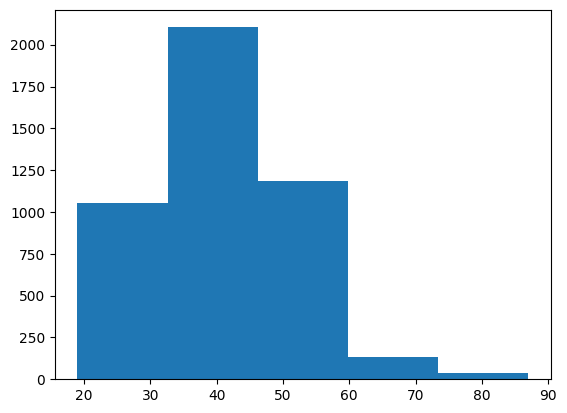

In [9]:
# Prikaz podele u 5 kategorija na histogramu
import matplotlib.pyplot as plt
a, b, c = plt.hist(data["STAROST"], bins=5)
print(a, b, c)

In [10]:
data['STAROST'] = pd.cut(data['STAROST'], bins=5, labels=[1, 2, 3, 4, 5])

In [11]:
# Promeniti kategorije atributa bracno_stanje u u_braku i nije_u_braku.
unique_values = data['BRACNO_STANJE'].unique()
unique_values

array(['u_braku', 'samac', 'razveden(a)'], dtype=object)

In [12]:
data['BRACNO_STANJE'].replace(unique_values[1:], 'nije_u_braku', inplace=True)
data['BRACNO_STANJE'].unique()

array(['u_braku', 'nije_u_braku'], dtype=object)

In [13]:
# Standardizovati numeričke atribute
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaler.fit_transform(data)   # greska, jer prosledjujemo sve atribute, a treba samo numericke

In [14]:
# izdvajanje numerickih atributa
data.dtypes

STAROST                   category
POSAO                       object
BRACNO_STANJE               object
OBRAZOVANJE                 object
SREDNJE_GOD_STANJE_EUR       int64
STAMBENI_KREDIT             object
LICNI_KREDIT                object
KONTAKT                     object
DUZINA_RAZGOVORA_SEC         int64
BROJ_RAZGOVORA               int64
OROCENA_STEDNJA             object
dtype: object

In [15]:
num_attr = data.dtypes[data.dtypes == 'int64'].index # hocemo da izdvojimo 3 atributa tipa int64
data[num_attr] = scaler.fit_transform(data[num_attr])

In [16]:
data.describe()

,SREDNJE_GOD_STANJE_EUR,DUZINA_RAZGOVORA_SEC,BROJ_RAZGOVORA
count,4.521000e+03,4.521000e+03,4.521000e+03
mean,-1.571649e-17,-7.622500e-17,-6.286598e-18
std,1.000111e+00,1.000111e+00,1.000111e+00
min,-1.573671e+00,-1.000513e+00,-5.768295e-01
25%,-4.498240e-01,-6.156433e-01,-5.768295e-01
50%,-3.252105e-01,-3.038984e-01,-2.552305e-01
75%,1.905496e-02,2.503146e-01,6.636847e-02
max,2.318321e+01,1.062641e+01,1.518152e+01
